<a href="https://colab.research.google.com/github/IgorRachev27/Portfolio/blob/main/Classification/REBOOT_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка эффективности маркетинговой стратегии банка

#### Импортируем основные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

#### считываем файл с гитхаба по ссылке и сохраняем в переменную df

In [ ]:
path='https://raw.githubusercontent.com/IgorRachev27/Homework/main/bank-additional-full.csv'

In [ ]:
df=pd.read_csv(path, sep=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Изучим данные

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#### Посмотрим на данные типа object где и сколько и каких значений.

In [ ]:
for i in df.columns:
    if df[i].dtypes==object:
        print (i,'\n', df[i].value_counts(),'\n')

job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact 
 cellular     26144
telephon

#### можно увидеть, что данные типа Nan заменены на строковые типа unknown

#### вернём обратно в Nan и посмотрим графически на данные

In [ ]:
df[df=='unknown']=np.nan

In [ ]:
df[df!=np.nan]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Импортируем figure для задания размера графика

In [ ]:
from matplotlib.pyplot import figure

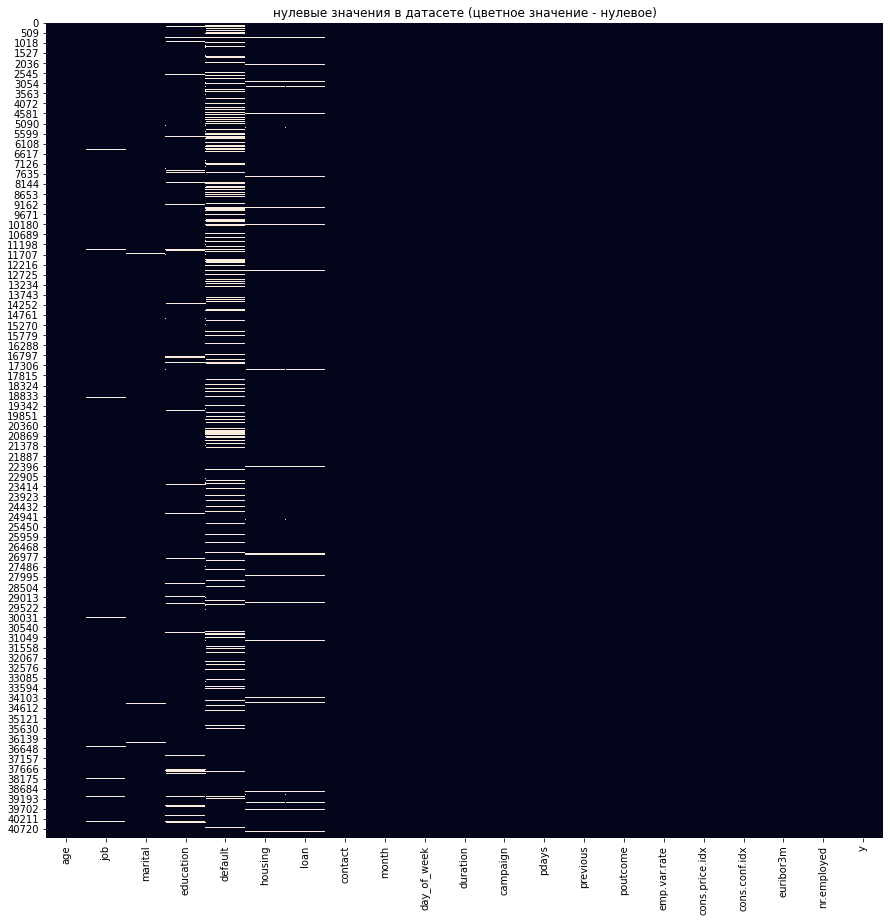

In [ ]:
figure(figsize = (15, 15))
plt.title("нулевые значения в датасете (цветное значение - нулевое)")
plt.xlabel('значение в строке')
plt.ylabel('строка датасета')
sns.heatmap(df.isnull(), cbar=False)

#### удалим столбец с наибольшим количеством значений Nan

In [ ]:
del df['default']
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


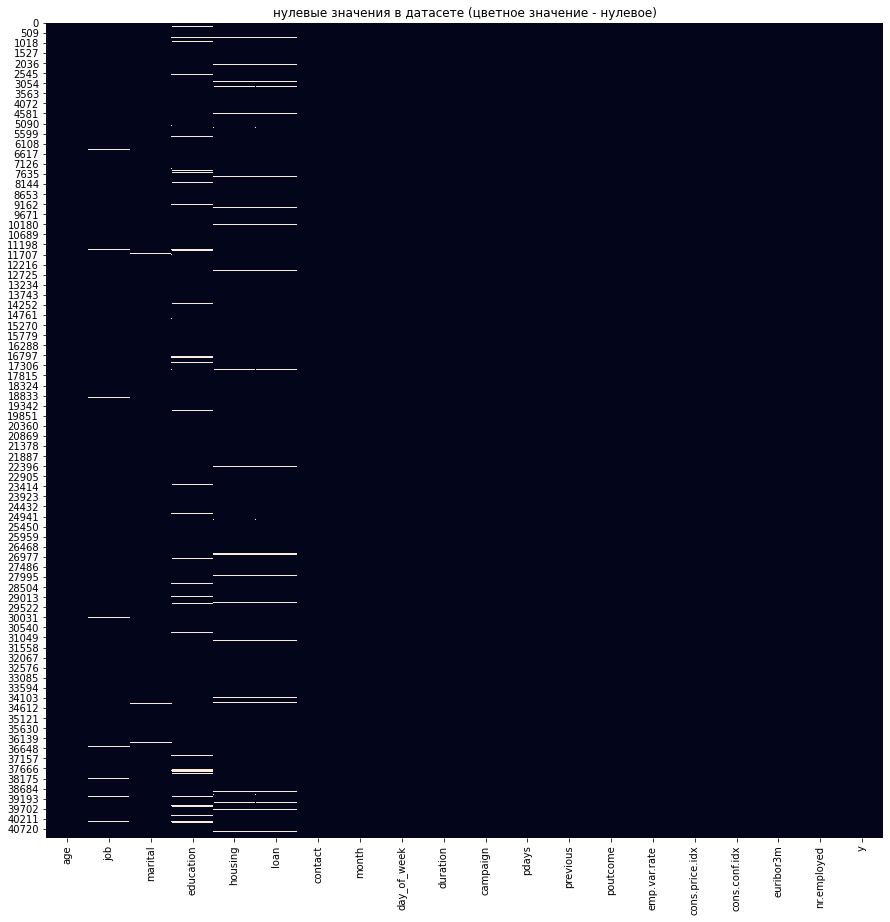

In [ ]:
figure(figsize = (15, 15))
plt.title("нулевые значения в датасете (цветное значение - нулевое)")
plt.xlabel('значение в строке')
plt.ylabel('строка датасета')
sns.heatmap(df.isnull(), cbar=False)

#### Оставшиеся значения Nan заполним предыдущим значением

In [ ]:
df=df.ffill()
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Произведём энкодинг данных, импортировав preprocessing из библиотеки sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
def encoding(DF):
    encoded_data=DF.copy()
    encoders={}
    for column in encoded_data:
        if encoded_data[column].dtype==object:
            encoders[column]=preprocessing.LabelEncoder()
            encoded_data[column]=encoders[column].fit_transform(encoded_data[column])
    return encoded_data, encoders

In [ ]:
df, encoders = encoding(df)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Выделим в отдельную переменную значения, которые будем предсказывать и удалим их из датасете

In [ ]:
y=df['y']
del df['y']
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


Text(0.5, 1.0, 'корелляция между признаками датасета')

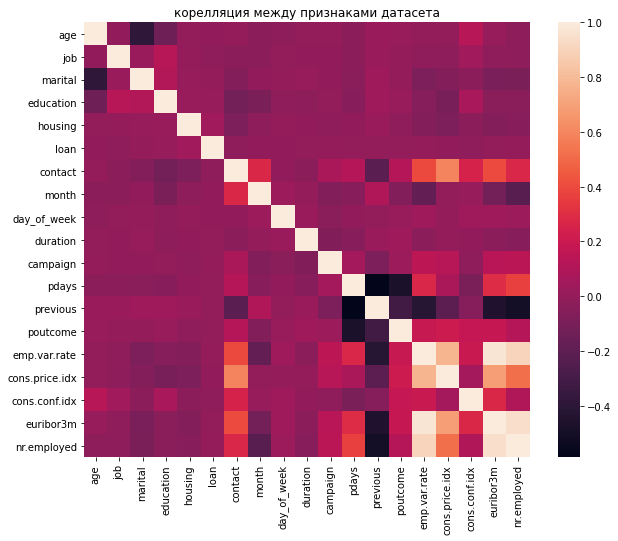

In [ ]:
fig = plt.subplots(figsize=(10,8))    
sns.heatmap(df.corr())
plt.title("корелляция между признаками датасета")

#### Удалим столбец euribor3m из-за высокой корреляции с другими столбцами

In [ ]:
del df['euribor3m']

#### Посмотрим на балансировку классов

Text(0, 0.5, 'количество элементов класса')

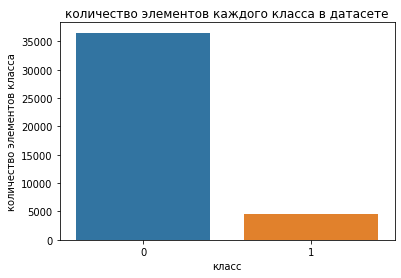

In [ ]:
sns.countplot(y)
plt.title("количество элементов каждого класса в датасете")
plt.xlabel('класс')
plt.ylabel('количество элементов класса')

#### Видим что классы несбалансированы

## Подготовим наборы данных для дальнейшего исследования

#### Отмасштабируем данные

In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler

In [ ]:
df=scale(df,with_std=True, with_mean=True)

In [ ]:
df

array([[ 1.53303429, -0.18841506, -0.27961059, ...,  0.72272247,
         0.88644656,  0.33167991],
       [ 1.62899323,  0.93865478, -0.27961059, ...,  0.72272247,
         0.88644656,  0.33167991],
       [-0.29018564,  0.93865478, -0.27961059, ...,  0.72272247,
         0.88644656,  0.33167991],
       ...,
       [ 1.53303429,  0.37511986, -0.27961059, ...,  2.05816805,
        -2.22495344, -2.8156966 ],
       [ 0.38152696,  1.50218969, -0.27961059, ...,  2.05816805,
        -2.22495344, -2.8156966 ],
       [ 3.26029527,  0.37511986, -0.27961059, ...,  2.05816805,
        -2.22495344, -2.8156966 ]])

#### сделаем балансировку классов методом SMOTE и ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

augm = SMOTE(random_state=1, k_neighbors=5)
X_S, y_S = augm.fit_resample(df, y)

In [ ]:
augm = ADASYN(random_state=1)
X_A, y_A= augm.fit_resample(df, y)

#### Разделим выборку на обучающую и тестовую по методу train_test_split из библиотеки sklearn

#### Стандартный датасет

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df), np.array(y), test_size=0.15, random_state=23)

#### Датасет SMOTE

In [ ]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.15, random_state=23)

#### Датасет ADASYN

In [ ]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.15, random_state=23)

#### Добавим полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree=3
X_tr=PolynomialFeatures(degree).fit_transform(X_train)
X_tst=PolynomialFeatures(degree).fit_transform(X_test)

In [ ]:
degree=3
X_trS=PolynomialFeatures(degree).fit_transform(X_train_S)
X_tstS=PolynomialFeatures(degree).fit_transform(X_test_S)

### Используем библиотеку XGBoost для классификации

#### импортируем все необходимые лементы из соответствующих библиотек

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#### Оценим модель на датасете для всех видов обработанных данных

#### исходные

In [ ]:
model = XGBClassifier(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### SMOTE dataset

In [ ]:
model_S = XGBClassifier(objective='reg:squarederror')
model_S.fit(X_train_S, y_train_S)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### ADASYN dataset

In [ ]:
model_A = XGBClassifier(objective='reg:squarederror')
model_A.fit(X_train_A, y_train_A)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### polynomial

In [ ]:
model_P = XGBClassifier(objective='reg:squarederror')
model_P.fit(X_tr, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Сделаем предсказание и выведем любое предсказанное значение для всех видов обработанных данных

#### обычные

In [ ]:
yhat = model.predict(X_test)
print('Prediction: %.3f' % yhat[0])

Prediction: 0.000


#### SMOTE

In [ ]:
yhat_S = model_S.predict(X_test_S)
print('Prediction: %.3f' % yhat_S[0])

Prediction: 0.000


#### ADASYN

In [ ]:
yhat_A = model_A.predict(X_test_A)
print('Prediction: %.3f' % yhat_A[0])

Prediction: 1.000


#### polinonial

In [ ]:
yhat_P = model_P.predict(X_tst)
print('Prediction: %.3f' % yhat_P[0])

Prediction: 0.000


#### построим основные метрики

In [ ]:
from sklearn import metrics

#### обычный датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test,yhat))
print('MAE: ',metrics.mean_absolute_error(y_test,yhat))
print('Test ROC-AUC: ', roc_auc_score(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

R^2:  0.0941635226818619
MAE:  0.08561255866645089
Test ROC-AUC:  0.7414681480668581
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5526
           1       0.61      0.52      0.56       653

    accuracy                           0.91      6179
   macro avg       0.78      0.74      0.76      6179
weighted avg       0.91      0.91      0.91      6179



#### SMOTE датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test_S,yhat_S))
print('MAE: ',metrics.mean_absolute_error(y_test_S,yhat_S))
print('Test ROC-AUC: ', roc_auc_score(y_test_S,yhat_S))
print(metrics.classification_report(y_test_S,yhat_S))

R^2:  0.8015503067191159
MAE:  0.04961240310077519
Test ROC-AUC:  0.9503855971599247
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5479
           1       0.95      0.95      0.95      5486

    accuracy                           0.95     10965
   macro avg       0.95      0.95      0.95     10965
weighted avg       0.95      0.95      0.95     10965



#### ADASYN датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test_A,yhat_A))
print('MAE: ',metrics.mean_absolute_error(y_test_A,yhat_A))
print('Test ROC-AUC: ', roc_auc_score(y_test_A,yhat_A))
print(metrics.classification_report(y_test_A,yhat_A))

R^2:  0.7933824861949129
MAE:  0.0516517612703048
Test ROC-AUC:  0.9483910943862867
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5518
           1       0.94      0.95      0.95      5440

    accuracy                           0.95     10958
   macro avg       0.95      0.95      0.95     10958
weighted avg       0.95      0.95      0.95     10958



#### polynomial датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test,yhat_P))
print('MAE: ',metrics.mean_absolute_error(y_test,yhat_P))
print('Test ROC-AUC: ', roc_auc_score(y_test,yhat_P))
print(metrics.classification_report(y_test,yhat_P))

R^2:  0.07703995978359846
MAE:  0.08723094351836867
Test ROC-AUC:  0.7351616110725907
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5526
           1       0.60      0.51      0.55       653

    accuracy                           0.91      6179
   macro avg       0.77      0.74      0.75      6179
weighted avg       0.91      0.91      0.91      6179



#### Датасет SMOTE отработал лучше всего

## Применим для предсказания логистическую регрессию

#### Импортируем из библиотеки sklearn логистическую регрессию и сетку подбора параметров

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#### подбираем параметры логистической регрессии через сетку

In [ ]:
regr=LogisticRegression(class_weight = 'balanced')
log_grid = {'C': np.arange(0,5,0.5), 'penalty':['l1','l2', 'elasticnet'], 
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

In [ ]:
gs = GridSearchCV(regr, log_grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

#### применяем лучшие параметры для объекта логистической регрессии

In [ ]:
C_best=gs.best_params_['C']
P_best=gs.best_params_['penalty']
S_best=gs.best_params_['solver']

In [ ]:
C_best, P_best, S_best

(0.5, 'l1', 'saga')

In [ ]:
regr=LogisticRegression(C=C_best, penalty=P_best, solver=S_best)

#### делаем предсказание моделью

In [ ]:
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)

#### Посмотрим основные метрики

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted))
print('Test F measure: ', f1_score(y_test, y_predicted))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

Test accuracy:  0.9147111183039327
Test F measure:  0.510677808727948
Test ROC-AUC:  0.697084892855104
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5526
           1       0.65      0.42      0.51       653

    accuracy                           0.91      6179
   macro avg       0.79      0.70      0.73      6179
weighted avg       0.90      0.91      0.91      6179



#### Протестируем сетку параметров для датасета SMOTE

In [ ]:
gs = GridSearchCV(regr, log_grid, cv=5)
gs.fit(X_train_S, y_train_S)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.5, penalty='l1', solver='saga'),
             param_grid={'C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
C_best=gs.best_params_['C']
P_best=gs.best_params_['penalty']
S_best=gs.best_params_['solver']

#### Протестируем модель

In [ ]:
regr=LogisticRegression(C=C_best, penalty=P_best, solver=S_best)

In [ ]:
regr.fit(X_train_S, y_train_S)
y_predicted_S = regr.predict(X_test_S)

#### выведем основные метрики

In [ ]:
print('Test accuracy: ', accuracy_score(y_test_S, y_predicted_S))
print('Test F measure: ', f1_score(y_test_S, y_predicted_S))
print('Test ROC-AUC: ', roc_auc_score(y_test_S, y_predicted_S))
print(metrics.classification_report(y_test_S, y_predicted_S))

Test accuracy:  0.8740538075695394
Test F measure:  0.8751243331223438
Test ROC-AUC:  0.8740486909984145
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5479
           1       0.87      0.88      0.88      5486

    accuracy                           0.87     10965
   macro avg       0.87      0.87      0.87     10965
weighted avg       0.87      0.87      0.87     10965



## Попробуем нейросеть написанную на pytorch

#### импортируем библиотеку torch

In [ ]:
import torch

#### Создадим из тренеровочной части тензоры и обернём их в формат Variable

In [ ]:
X = torch.autograd.Variable(torch.FloatTensor(X_train))
y = torch.autograd.Variable(torch.LongTensor(y_train))

#### Зададим основные параметры входящих и выходящих массивов

In [ ]:
# N - размер батча; 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 600, 18, 100, 2

#### определим слои для сетки

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out))

#### Запишем функцию потерь для нейросети

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

#### Введём доп параметры для сети

In [ ]:
loss_array=[] # для графика
epoch=11000 # количество проходов по сети (циклов)
t=0 # начальное значение для прохода

#### выберем для расчётов один из вариантов скорости обучения: изменяемый и постоянный

In [ ]:
def learn_r(X):
    '''if t<(X/3):
        return 1e-3
    elif (2*X/3)>t>(X/3):
        return 1e-4
    else:
        return 1e-5'''
    return 1e-2

#### определим оптимизатор для нейросети (АДАМ)

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=learn_r(epoch))

#### Сам цикл обучения

In [ ]:
for t in range(epoch):
    # forward
    y_pred = net(X)
    # loss
    loss = loss_fn(y_pred, y)
    loss_array.append(loss.data)
    # зануляем градиенты (чтобы не было остатка с предыдущего шага)
    optimizer.zero_grad()
    # backward
    loss.backward()
    # обновляем
    optimizer.step()

#### Посмотрим как изменялся график функции потерь

Text(0, 0.5, 'лосс')

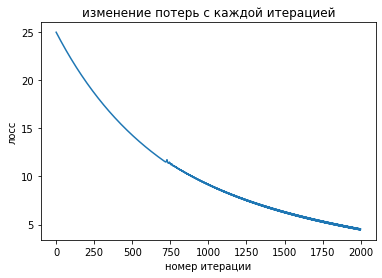

In [ ]:
plt.plot(loss_array[9000:11000])
plt.title("изменение потерь с каждой итерацией")
plt.xlabel('номер итерации')
plt.ylabel('лосс')

#### Создадим функцию для предсказания модели выводящую вектор значений, обработанный функцией softmax

In [ ]:
softmax=torch.nn.Softmax()

In [ ]:
def predict(X):
    y_pr=[]
    for i in range(X):
        y_pr.append(softmax(y_pred[i]).round().argmax())
    return y_pr

In [ ]:
print("Финальный лосс ",loss.data)

Финальный лосс  tensor(4.5499)


#### Протестируем модель на тестовой выборке

In [ ]:
y_pr=predict(y_pred.shape[0])
Y=net(torch.autograd.Variable(torch.FloatTensor(X_test))).detach().numpy()
Y=predict(Y.shape[0])

сохраним модель

In [ ]:
torch.save(net,'/Users/igorrachev/Downloads/pytorch_Net')

In [ ]:
# path_torch=''
# torch.load(path_torch)

In [ ]:
print('R^2: ', metrics.r2_score(y_test,Y))
print('MAE: ',metrics.mean_absolute_error(y_test,Y))
print('Test ROC-AUC: ', roc_auc_score(y_test, Y))
print(metrics.classification_report(y_test,Y))

R^2:  -1.037703984893354
MAE:  0.19258779737821655
Test ROC-AUC:  0.49530051173929834
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5526
           1       0.10      0.10      0.10       653

    accuracy                           0.81      6179
   macro avg       0.50      0.50      0.50      6179
weighted avg       0.81      0.81      0.81      6179



## SVM

In [ ]:
from sklearn.svm import SVC

#### Создадим объект SVM

In [ ]:
Svc=SVC()

#### Построим сетку параметров и протестируем модель

In [ ]:
grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gs=GridSearchCV(Svc, grid, cv=5)
gs.fit(X_train_S[:2000], y_train_S[:2000])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
gs.best_params_['kernel']

'rbf'

#### протестируем модель

In [ ]:
Svc=SVC(kernel=gs.best_params_['kernel'])

Svc.fit(X_train_S, y_train_S)
Svc.score(X_test_S, y_test_S)

0.9054263565891473

#### сделаем предсказания

In [ ]:
a=Svc.predict(X_test_S)
a

array([0, 0, 1, ..., 1, 1, 0])

Text(0, 0.5, 'количество элементов в классе')

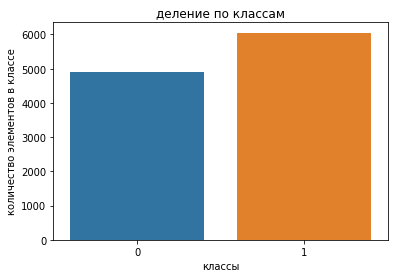

In [ ]:
sns.countplot(a)
plt.title("деление по классам")
plt.xlabel('классы')
plt.ylabel('количество элементов в классе')

#### посчитаем метрики

In [ ]:
print('R^2: ', metrics.r2_score(y_test_S,a))
print('MAE: ',metrics.mean_absolute_error(y_test_S,a))
print('Test ROC-AUC: ', roc_auc_score(y_test_S,a))
print(metrics.classification_report(y_test_S,a))

R^2:  0.6217052721833145
MAE:  0.09457364341085271
Test ROC-AUC:  0.9053934230835438
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5479
           1       0.87      0.96      0.91      5486

    accuracy                           0.91     10965
   macro avg       0.91      0.91      0.91     10965
weighted avg       0.91      0.91      0.91     10965



## Catboost classifier

In [ ]:
# pip install catboost

In [ ]:
from catboost import CatBoostClassifier

#### создадим объект класса CatBoostClassifier

In [ ]:
model = CatBoostClassifier(
    iterations=1000,
    loss_function='Logloss',#Logloss , CrossEntropy
    task_type="CPU",
    devices='0',
    learning_rate=0.04)

#### обучим модель

In [ ]:
model.fit(X_train,
          y_train,
          verbose=True,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6217796	total: 68ms	remaining: 1m 7s
1:	learn: 0.5723815	total: 82.7ms	remaining: 41.2s
2:	learn: 0.5207446	total: 97.4ms	remaining: 32.4s
3:	learn: 0.4839808	total: 112ms	remaining: 27.9s
4:	learn: 0.4517351	total: 125ms	remaining: 24.8s
5:	learn: 0.4232869	total: 139ms	remaining: 23.1s
6:	learn: 0.3979946	total: 154ms	remaining: 21.8s
7:	learn: 0.3772817	total: 168ms	remaining: 20.8s
8:	learn: 0.3589001	total: 183ms	remaining: 20.2s
9:	learn: 0.3414048	total: 197ms	remaining: 19.5s
10:	learn: 0.3231053	total: 211ms	remaining: 19s
11:	learn: 0.3054089	total: 226ms	remaining: 18.6s
12:	learn: 0.2953449	total: 241ms	remaining: 18.3s
13:	learn: 0.2835180	total: 257ms	remaining: 18.1s
14:	learn: 0.2755714	total: 274ms	remaining: 18s
15:	learn: 0.2679107	total: 290ms	remaining: 17.9s
16:	learn: 0.2607386	total: 304ms	remaining: 17.6s
17:	learn: 0.2555005	total: 314ms	remaining: 17.1s
18:	learn: 0.2513844	total: 321ms	remaining: 16.6s
19:	learn: 0.2468657	total: 329ms	remaining:

179:	learn: 0.1689183	total: 1.92s	remaining: 8.76s
180:	learn: 0.1688523	total: 1.94s	remaining: 8.78s
181:	learn: 0.1688066	total: 1.95s	remaining: 8.78s
182:	learn: 0.1687091	total: 1.97s	remaining: 8.81s
183:	learn: 0.1685874	total: 1.99s	remaining: 8.81s
184:	learn: 0.1685423	total: 2s	remaining: 8.8s
185:	learn: 0.1684448	total: 2.01s	remaining: 8.79s
186:	learn: 0.1683296	total: 2.02s	remaining: 8.78s
187:	learn: 0.1682745	total: 2.03s	remaining: 8.77s
188:	learn: 0.1681980	total: 2.04s	remaining: 8.75s
189:	learn: 0.1681151	total: 2.05s	remaining: 8.75s
190:	learn: 0.1680360	total: 2.06s	remaining: 8.74s
191:	learn: 0.1679485	total: 2.07s	remaining: 8.72s
192:	learn: 0.1678393	total: 2.08s	remaining: 8.71s
193:	learn: 0.1677292	total: 2.09s	remaining: 8.7s
194:	learn: 0.1676523	total: 2.1s	remaining: 8.68s
195:	learn: 0.1675932	total: 2.11s	remaining: 8.67s
196:	learn: 0.1675203	total: 2.13s	remaining: 8.66s
197:	learn: 0.1674304	total: 2.14s	remaining: 8.67s
198:	learn: 0.1673

340:	learn: 0.1596439	total: 4.19s	remaining: 8.09s
341:	learn: 0.1595663	total: 4.21s	remaining: 8.09s
342:	learn: 0.1595155	total: 4.22s	remaining: 8.09s
343:	learn: 0.1594554	total: 4.24s	remaining: 8.09s
344:	learn: 0.1593780	total: 4.26s	remaining: 8.09s
345:	learn: 0.1593113	total: 4.28s	remaining: 8.09s
346:	learn: 0.1592954	total: 4.3s	remaining: 8.09s
347:	learn: 0.1592324	total: 4.31s	remaining: 8.08s
348:	learn: 0.1592169	total: 4.32s	remaining: 8.07s
349:	learn: 0.1591482	total: 4.33s	remaining: 8.05s
350:	learn: 0.1590918	total: 4.34s	remaining: 8.03s
351:	learn: 0.1590737	total: 4.35s	remaining: 8.02s
352:	learn: 0.1590265	total: 4.36s	remaining: 8s
353:	learn: 0.1589712	total: 4.37s	remaining: 7.98s
354:	learn: 0.1589581	total: 4.38s	remaining: 7.96s
355:	learn: 0.1589066	total: 4.4s	remaining: 7.96s
356:	learn: 0.1588592	total: 4.42s	remaining: 7.96s
357:	learn: 0.1587858	total: 4.43s	remaining: 7.94s
358:	learn: 0.1587465	total: 4.44s	remaining: 7.92s
359:	learn: 0.158

509:	learn: 0.1518062	total: 6.21s	remaining: 5.96s
510:	learn: 0.1517591	total: 6.23s	remaining: 5.96s
511:	learn: 0.1517205	total: 6.24s	remaining: 5.95s
512:	learn: 0.1516715	total: 6.25s	remaining: 5.93s
513:	learn: 0.1516246	total: 6.26s	remaining: 5.92s
514:	learn: 0.1515975	total: 6.27s	remaining: 5.9s
515:	learn: 0.1515589	total: 6.28s	remaining: 5.89s
516:	learn: 0.1515090	total: 6.29s	remaining: 5.87s
517:	learn: 0.1514846	total: 6.29s	remaining: 5.86s
518:	learn: 0.1514454	total: 6.3s	remaining: 5.84s
519:	learn: 0.1514011	total: 6.31s	remaining: 5.83s
520:	learn: 0.1513525	total: 6.33s	remaining: 5.82s
521:	learn: 0.1513431	total: 6.34s	remaining: 5.81s
522:	learn: 0.1513016	total: 6.36s	remaining: 5.8s
523:	learn: 0.1512552	total: 6.38s	remaining: 5.8s
524:	learn: 0.1512261	total: 6.4s	remaining: 5.79s
525:	learn: 0.1511836	total: 6.42s	remaining: 5.79s
526:	learn: 0.1511522	total: 6.44s	remaining: 5.78s
527:	learn: 0.1511181	total: 6.46s	remaining: 5.77s
528:	learn: 0.151

675:	learn: 0.1454325	total: 8.29s	remaining: 3.98s
676:	learn: 0.1453837	total: 8.31s	remaining: 3.97s
677:	learn: 0.1453519	total: 8.33s	remaining: 3.96s
678:	learn: 0.1453328	total: 8.35s	remaining: 3.95s
679:	learn: 0.1453093	total: 8.37s	remaining: 3.94s
680:	learn: 0.1452809	total: 8.38s	remaining: 3.93s
681:	learn: 0.1452393	total: 8.4s	remaining: 3.92s
682:	learn: 0.1451946	total: 8.42s	remaining: 3.91s
683:	learn: 0.1451466	total: 8.44s	remaining: 3.9s
684:	learn: 0.1451214	total: 8.45s	remaining: 3.89s
685:	learn: 0.1450641	total: 8.47s	remaining: 3.88s
686:	learn: 0.1450356	total: 8.49s	remaining: 3.87s
687:	learn: 0.1449991	total: 8.5s	remaining: 3.86s
688:	learn: 0.1449724	total: 8.52s	remaining: 3.85s
689:	learn: 0.1449234	total: 8.54s	remaining: 3.84s
690:	learn: 0.1449051	total: 8.55s	remaining: 3.83s
691:	learn: 0.1448359	total: 8.56s	remaining: 3.81s
692:	learn: 0.1448035	total: 8.57s	remaining: 3.8s
693:	learn: 0.1447748	total: 8.59s	remaining: 3.79s
694:	learn: 0.14

845:	learn: 0.1394724	total: 11s	remaining: 2s
846:	learn: 0.1394499	total: 11s	remaining: 1.99s
847:	learn: 0.1394357	total: 11s	remaining: 1.97s
848:	learn: 0.1394040	total: 11s	remaining: 1.96s
849:	learn: 0.1393923	total: 11.1s	remaining: 1.95s
850:	learn: 0.1393533	total: 11.1s	remaining: 1.94s
851:	learn: 0.1393150	total: 11.1s	remaining: 1.93s
852:	learn: 0.1392747	total: 11.1s	remaining: 1.92s
853:	learn: 0.1392396	total: 11.1s	remaining: 1.91s
854:	learn: 0.1391950	total: 11.2s	remaining: 1.89s
855:	learn: 0.1391735	total: 11.2s	remaining: 1.88s
856:	learn: 0.1391495	total: 11.2s	remaining: 1.87s
857:	learn: 0.1391424	total: 11.2s	remaining: 1.86s
858:	learn: 0.1391255	total: 11.2s	remaining: 1.85s
859:	learn: 0.1391071	total: 11.3s	remaining: 1.83s
860:	learn: 0.1390895	total: 11.3s	remaining: 1.82s
861:	learn: 0.1390557	total: 11.3s	remaining: 1.81s
862:	learn: 0.1390224	total: 11.3s	remaining: 1.79s
863:	learn: 0.1389929	total: 11.3s	remaining: 1.78s
864:	learn: 0.1389487	t

#### сделаем предсказания

In [ ]:
preds = model.predict(X_test)

#### посчитаем метрики

In [ ]:
print(metrics.r2_score(y_test, preds))
print('Test ROC-AUC: ', roc_auc_score(y_test, preds))
print(metrics.classification_report(y_test,preds))

0.11642415444960441
Test ROC-AUC:  0.7426444057577738
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5526
           1       0.63      0.52      0.57       653

    accuracy                           0.92      6179
   macro avg       0.79      0.74      0.76      6179
weighted avg       0.91      0.92      0.91      6179



### Попробуем датасет SMOTE

#### обучим модель

In [ ]:
model.fit(X_train_S,
          y_train_S,
          verbose=True,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6514710	total: 28.7ms	remaining: 28.6s
1:	learn: 0.6145249	total: 49.1ms	remaining: 24.5s
2:	learn: 0.5804325	total: 67.7ms	remaining: 22.5s
3:	learn: 0.5505276	total: 86.7ms	remaining: 21.6s
4:	learn: 0.5223592	total: 105ms	remaining: 20.9s
5:	learn: 0.4961519	total: 124ms	remaining: 20.5s
6:	learn: 0.4744756	total: 142ms	remaining: 20.2s
7:	learn: 0.4553188	total: 161ms	remaining: 20s
8:	learn: 0.4395240	total: 182ms	remaining: 20.1s
9:	learn: 0.4251145	total: 204ms	remaining: 20.2s
10:	learn: 0.4121411	total: 225ms	remaining: 20.2s
11:	learn: 0.4004508	total: 244ms	remaining: 20.1s
12:	learn: 0.3902344	total: 263ms	remaining: 20s
13:	learn: 0.3808839	total: 282ms	remaining: 19.8s
14:	learn: 0.3716224	total: 300ms	remaining: 19.7s
15:	learn: 0.3639457	total: 318ms	remaining: 19.6s
16:	learn: 0.3559101	total: 337ms	remaining: 19.5s
17:	learn: 0.3486032	total: 356ms	remaining: 19.4s
18:	learn: 0.3386325	total: 375ms	remaining: 19.4s
19:	learn: 0.3316010	total: 393ms	remaini

170:	learn: 0.1354456	total: 2.95s	remaining: 14.3s
171:	learn: 0.1353434	total: 2.97s	remaining: 14.3s
172:	learn: 0.1351897	total: 2.99s	remaining: 14.3s
173:	learn: 0.1350543	total: 3.01s	remaining: 14.3s
174:	learn: 0.1348684	total: 3.03s	remaining: 14.3s
175:	learn: 0.1347380	total: 3.05s	remaining: 14.3s
176:	learn: 0.1345573	total: 3.07s	remaining: 14.3s
177:	learn: 0.1343921	total: 3.09s	remaining: 14.3s
178:	learn: 0.1342134	total: 3.11s	remaining: 14.3s
179:	learn: 0.1340900	total: 3.13s	remaining: 14.3s
180:	learn: 0.1340378	total: 3.15s	remaining: 14.2s
181:	learn: 0.1337444	total: 3.17s	remaining: 14.2s
182:	learn: 0.1333980	total: 3.19s	remaining: 14.2s
183:	learn: 0.1332241	total: 3.2s	remaining: 14.2s
184:	learn: 0.1331315	total: 3.21s	remaining: 14.2s
185:	learn: 0.1330541	total: 3.22s	remaining: 14.1s
186:	learn: 0.1328565	total: 3.23s	remaining: 14.1s
187:	learn: 0.1325592	total: 3.24s	remaining: 14s
188:	learn: 0.1324896	total: 3.25s	remaining: 14s
189:	learn: 0.132

335:	learn: 0.1154393	total: 5.25s	remaining: 10.4s
336:	learn: 0.1153395	total: 5.26s	remaining: 10.4s
337:	learn: 0.1152974	total: 5.28s	remaining: 10.3s
338:	learn: 0.1152484	total: 5.29s	remaining: 10.3s
339:	learn: 0.1152069	total: 5.3s	remaining: 10.3s
340:	learn: 0.1151735	total: 5.31s	remaining: 10.3s
341:	learn: 0.1150666	total: 5.33s	remaining: 10.2s
342:	learn: 0.1150382	total: 5.34s	remaining: 10.2s
343:	learn: 0.1149859	total: 5.35s	remaining: 10.2s
344:	learn: 0.1149304	total: 5.37s	remaining: 10.2s
345:	learn: 0.1149037	total: 5.39s	remaining: 10.2s
346:	learn: 0.1148666	total: 5.41s	remaining: 10.2s
347:	learn: 0.1147391	total: 5.43s	remaining: 10.2s
348:	learn: 0.1147111	total: 5.45s	remaining: 10.2s
349:	learn: 0.1146093	total: 5.46s	remaining: 10.1s
350:	learn: 0.1145505	total: 5.48s	remaining: 10.1s
351:	learn: 0.1145072	total: 5.5s	remaining: 10.1s
352:	learn: 0.1144625	total: 5.51s	remaining: 10.1s
353:	learn: 0.1143457	total: 5.53s	remaining: 10.1s
354:	learn: 0.

501:	learn: 0.1057515	total: 7.97s	remaining: 7.91s
502:	learn: 0.1057176	total: 7.99s	remaining: 7.9s
503:	learn: 0.1056816	total: 8.02s	remaining: 7.89s
504:	learn: 0.1056594	total: 8.04s	remaining: 7.88s
505:	learn: 0.1056105	total: 8.06s	remaining: 7.87s
506:	learn: 0.1055831	total: 8.09s	remaining: 7.86s
507:	learn: 0.1055424	total: 8.11s	remaining: 7.86s
508:	learn: 0.1054305	total: 8.14s	remaining: 7.85s
509:	learn: 0.1053546	total: 8.16s	remaining: 7.84s
510:	learn: 0.1053088	total: 8.19s	remaining: 7.83s
511:	learn: 0.1052826	total: 8.21s	remaining: 7.83s
512:	learn: 0.1052651	total: 8.24s	remaining: 7.82s
513:	learn: 0.1052334	total: 8.27s	remaining: 7.82s
514:	learn: 0.1051981	total: 8.29s	remaining: 7.81s
515:	learn: 0.1050550	total: 8.32s	remaining: 7.8s
516:	learn: 0.1049679	total: 8.34s	remaining: 7.79s
517:	learn: 0.1049460	total: 8.36s	remaining: 7.78s
518:	learn: 0.1048985	total: 8.38s	remaining: 7.77s
519:	learn: 0.1048694	total: 8.41s	remaining: 7.76s
520:	learn: 0.

671:	learn: 0.0985464	total: 10.9s	remaining: 5.33s
672:	learn: 0.0984983	total: 11s	remaining: 5.33s
673:	learn: 0.0984779	total: 11s	remaining: 5.31s
674:	learn: 0.0984600	total: 11s	remaining: 5.3s
675:	learn: 0.0983637	total: 11s	remaining: 5.28s
676:	learn: 0.0983467	total: 11s	remaining: 5.27s
677:	learn: 0.0983176	total: 11.1s	remaining: 5.25s
678:	learn: 0.0982943	total: 11.1s	remaining: 5.23s
679:	learn: 0.0982733	total: 11.1s	remaining: 5.21s
680:	learn: 0.0982529	total: 11.1s	remaining: 5.2s
681:	learn: 0.0982253	total: 11.1s	remaining: 5.18s
682:	learn: 0.0982026	total: 11.1s	remaining: 5.16s
683:	learn: 0.0981918	total: 11.1s	remaining: 5.14s
684:	learn: 0.0981155	total: 11.1s	remaining: 5.13s
685:	learn: 0.0981001	total: 11.2s	remaining: 5.11s
686:	learn: 0.0980876	total: 11.2s	remaining: 5.09s
687:	learn: 0.0980664	total: 11.2s	remaining: 5.08s
688:	learn: 0.0980288	total: 11.2s	remaining: 5.06s
689:	learn: 0.0979957	total: 11.2s	remaining: 5.04s
690:	learn: 0.0979738	to

831:	learn: 0.0938894	total: 13.6s	remaining: 2.76s
832:	learn: 0.0938637	total: 13.7s	remaining: 2.74s
833:	learn: 0.0938566	total: 13.7s	remaining: 2.72s
834:	learn: 0.0938329	total: 13.7s	remaining: 2.71s
835:	learn: 0.0938181	total: 13.7s	remaining: 2.69s
836:	learn: 0.0937923	total: 13.7s	remaining: 2.67s
837:	learn: 0.0937735	total: 13.7s	remaining: 2.65s
838:	learn: 0.0937483	total: 13.7s	remaining: 2.63s
839:	learn: 0.0937263	total: 13.7s	remaining: 2.62s
840:	learn: 0.0937089	total: 13.8s	remaining: 2.6s
841:	learn: 0.0936836	total: 13.8s	remaining: 2.58s
842:	learn: 0.0936425	total: 13.8s	remaining: 2.57s
843:	learn: 0.0936180	total: 13.8s	remaining: 2.55s
844:	learn: 0.0935961	total: 13.8s	remaining: 2.53s
845:	learn: 0.0935703	total: 13.8s	remaining: 2.51s
846:	learn: 0.0935552	total: 13.8s	remaining: 2.5s
847:	learn: 0.0935389	total: 13.8s	remaining: 2.48s
848:	learn: 0.0935117	total: 13.8s	remaining: 2.46s
849:	learn: 0.0934746	total: 13.9s	remaining: 2.45s
850:	learn: 0.

994:	learn: 0.0897498	total: 16.1s	remaining: 81ms
995:	learn: 0.0897271	total: 16.1s	remaining: 64.8ms
996:	learn: 0.0897084	total: 16.1s	remaining: 48.6ms
997:	learn: 0.0896890	total: 16.2s	remaining: 32.4ms
998:	learn: 0.0896705	total: 16.2s	remaining: 16.2ms
999:	learn: 0.0896428	total: 16.2s	remaining: 0us


#### сделаем предсказания

In [ ]:
preds_S = model.predict(X_test_S)

#### посчитаем метрики

In [ ]:
print(metrics.r2_score(y_test_S, preds_S))
print('Test ROC-AUC: ', roc_auc_score(y_test_S, preds_S))
print(metrics.classification_report(y_test_S,preds_S))

0.8190605737733114
Test ROC-AUC:  0.9547685202713146
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5479
           1       0.96      0.95      0.95      5486

    accuracy                           0.95     10965
   macro avg       0.95      0.95      0.95     10965
weighted avg       0.95      0.95      0.95     10965



# Финальная таблица результатов

In [ ]:
#XGB 4, Logistic regr 2, torch, catboost
data=[roc_auc_score(y_test,yhat).round(3),
      roc_auc_score(y_test_S,yhat_S).round(3),
      roc_auc_score(y_test_A,yhat_A).round(3),
      roc_auc_score(y_test,yhat_P).round(3),
      roc_auc_score(y_test, y_predicted).round(3),
      roc_auc_score(y_test_S, y_predicted_S).round(3),
      roc_auc_score(y_test, Y).round(3),
      roc_auc_score(y_test_S,a).round(3),
      roc_auc_score(y_test, preds).round(3), 
      roc_auc_score(y_test_S, preds_S).round(3)
     ]
data

[0.741, 0.95, 0.948, 0.735, 0.697, 0.874, 0.495, 0.905, 0.743, 0.955]

In [ ]:
cols=['XGB',
      'XGB_SMOTE',
      'XGB_ADASYN',
      'XGB_Polynom',
      'Logistic',
      'Logistic_SMOTE',
      'Pytorch',
      'SVR',
      'Catboost',
      'Catboost_SMOTE']

### Сравнение моделей и вариантов обработки данных по показателю ROC_AUC

In [ ]:
final=pd.DataFrame(data,cols).T

In [ ]:
final

,XGB,XGB_SMOTE,XGB_ADASYN,XGB_Polynom,Logistic,Logistic_SMOTE,Pytorch,SVR,Catboost,Catboost_SMOTE
0,0.741,0.95,0.948,0.735,0.697,0.874,0.495,0.905,0.743,0.955
